# PUMP IT UP:DATA MINING THE WATER                          TABLE

## TEAM ID :  5D08

## SEM        :  V

## DIV          :  D

## TOPIC ID: 5DMACP01


## Problem Statement:
### To predict the operating condition of a water point for each record in the given dataset.

### Team leader: Vinayak Dharmatti


### Team Members:
 ### Vinayak Dharmatti             268                                  01FE17BCS242
 ### Veeresh Pattar                   286                                  01FE18BCS431
 ### Abhishek Hiremath           272                                  01FE16BCS005 
 ### Anusha    H                        277                                  01FE16BCS036                        

In [ ]:
## Pump it Up: Data Mining the Water Table - Data Cleaning ##

# 1 Data reading

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [36]:
print("Reading data...")

train_values = pd.read_csv("training_set_values.csv")
train_labels=pd.read_csv("training_set_labels.csv")

test=pd.read_csv('test_set_values.csv')
test_copy=test.copy()

print("Reading data...completed")

Reading data...
Reading data...completed


### combining labels with train data

In [37]:
# Combining the labels with train data
train=train_values.merge(train_labels,on='id',how='inner')

In [38]:
data_labels=pd.read_csv('training_set_values.csv')
data_values=pd.read_csv('training_set_labels.csv')
train = data_values.merge(data_labels, on='id')

In [39]:
train.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [40]:
train["gps_height"].fillna(train.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
train["gps_height"].fillna(train.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
train["gps_height"].fillna(train["gps_height"].mean(), inplace=True)
train["population"].fillna(train.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
train["population"].fillna(train.groupby(['region'])["population"].transform("median"), inplace=True)
train["population"].fillna(train["population"].median(), inplace=True)
train["amount_tsh"].fillna(train.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
train["amount_tsh"].fillna(train.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
train["amount_tsh"].fillna(train["amount_tsh"].median(), inplace=True)
train.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

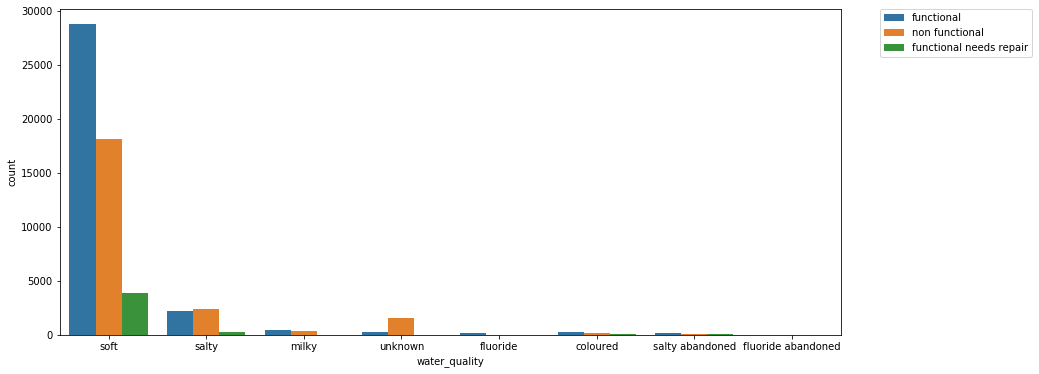

In [41]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
data.water_quality.value_counts()

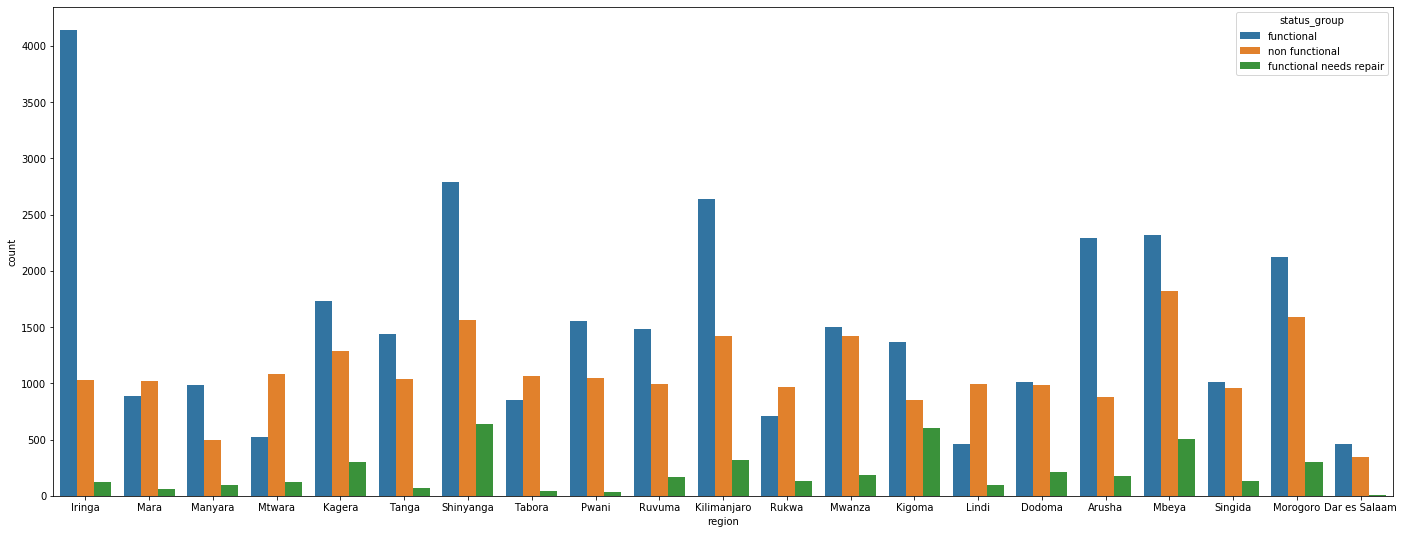

In [42]:
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='region',hue='status_group')

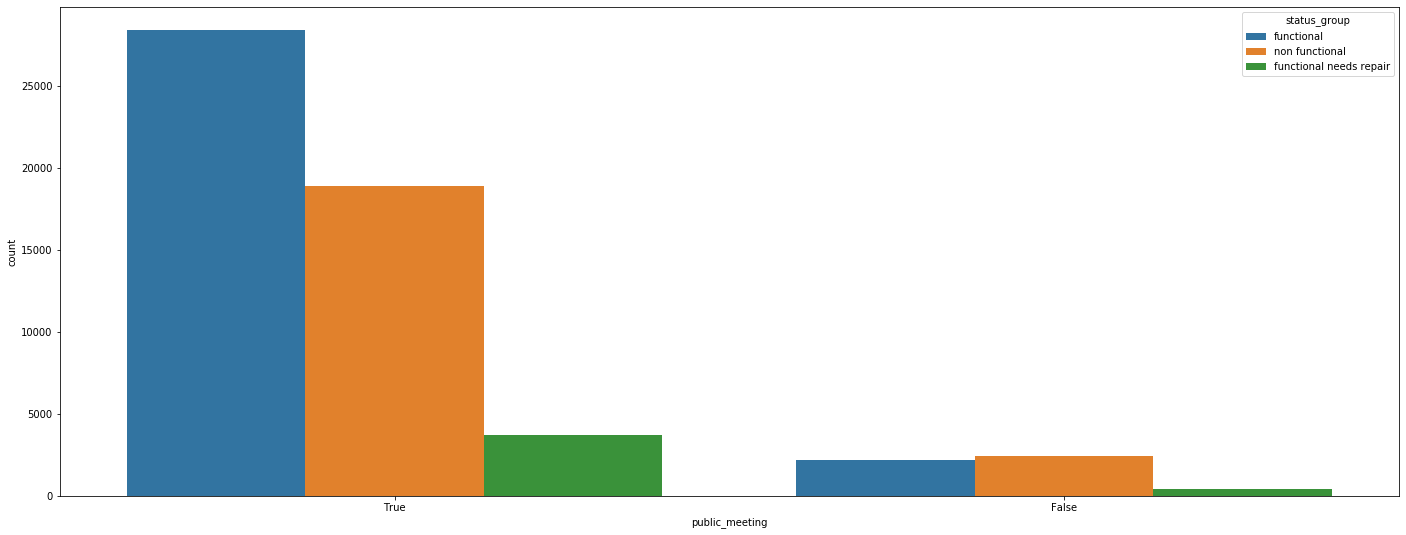

In [43]:
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='public_meeting',hue='status_group')

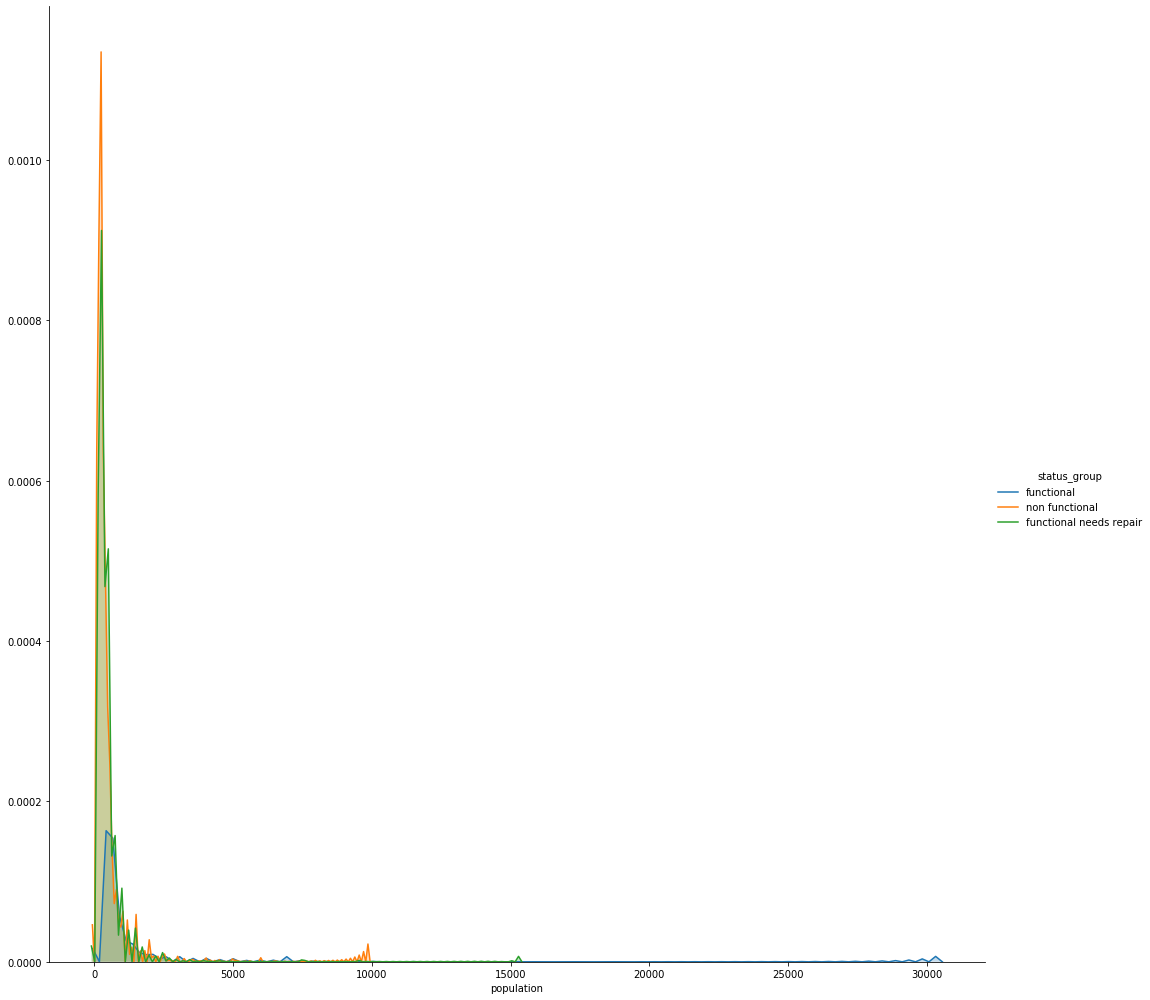

In [44]:
(sns
  .FacetGrid(data, 
             hue='status_group',size=14)
  .map(sns.kdeplot, 'population', shade=True)
 .add_legend()
)


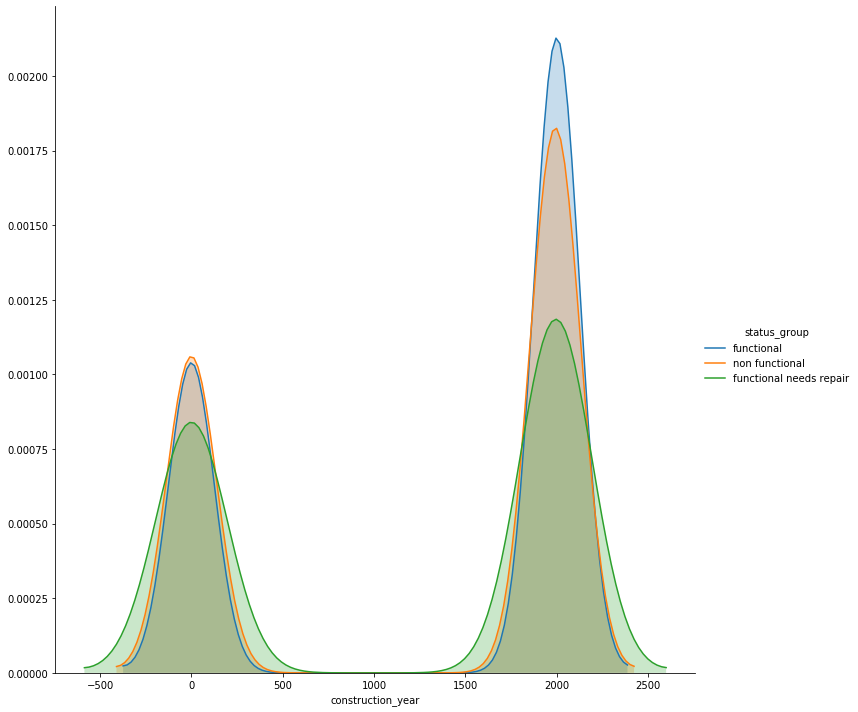

In [45]:
(sns
  .FacetGrid(data, 
             hue='status_group',size=10)
  .map(sns.kdeplot, 'construction_year', shade=True)
 .add_legend()
)

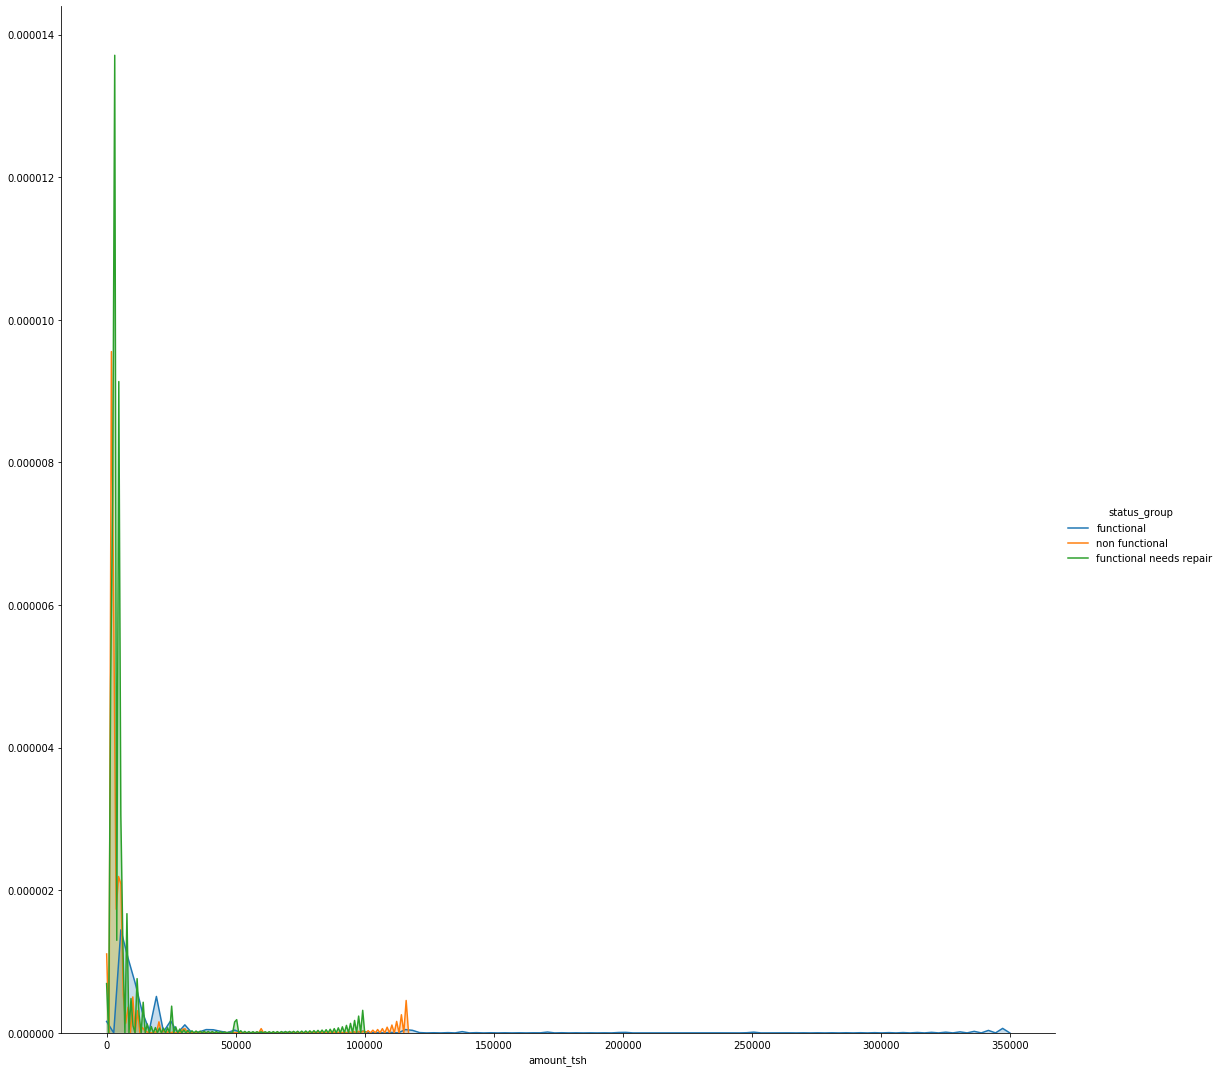

In [46]:
(sns
  .FacetGrid(data, 
             hue='status_group',size=15)
  .map(sns.kdeplot, 'amount_tsh', shade=True)
 .add_legend()
)

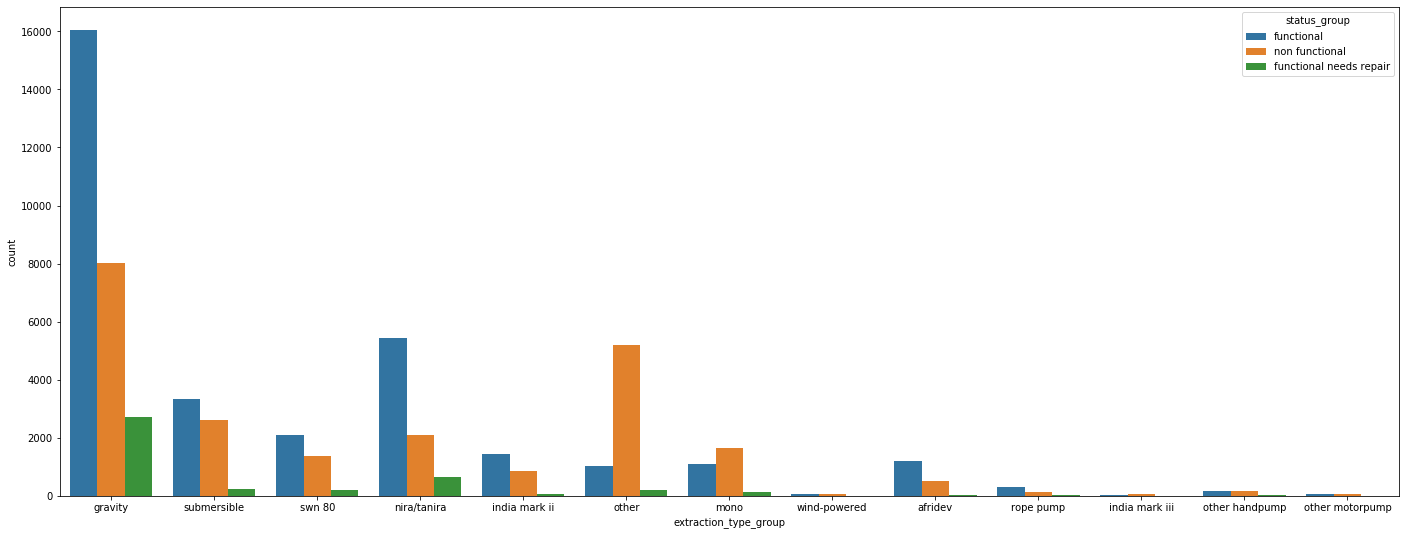

In [47]:
plt.figure(figsize=(24, 9))

sns.countplot(data=data,x='extraction_type_group',hue='status_group')

### converting status group label into neumerical data

In [48]:
#convert status group label into numerical data


val_status_group={'functional':2, 'functional needs repair':1,
                   'non functional':0}
train['status_group_vals']=train.status_group.replace(val_status_group)

train['status_group_vals'].head

<bound method NDFrame.head of 0        2
1        2
2        2
3        0
4        2
        ..
59395    2
59396    2
59397    2
59398    2
59399    2
Name: status_group_vals, Length: 59400, dtype: int64>

# 2 Data cleaning

In [49]:
# We can see few columns contain null values. Hence, we need to fix them before beginning any sort of Analysis on the data.

# Starting with value "funder"
train['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Oxfarm Gb                    1
Drv Na Idara                 1
Tquick Wings                 1
Ms-danish                    1
Jumanne Siabo                1
Name: funder, Length: 1897, dtype: int64

In [50]:
#Lets divide funder column into 9 categories, top 9 will be remained as it is and after that they will be categorised into other
# Creating a function to categorize:
# Keep high frequency values and replace low frequency values with new category "other"

def funder_cleaning(train):
    if train['funder']=='Government Of Tanzania':
        return 'government'
    elif train['funder']=='Danida':
        return 'danida'
    elif train['funder']=='Hesawa':
        return 'hesawa'
    elif train['funder']=='Rwssp':
        return 'rwssp'
    elif train['funder']=='World Bank':
        return 'world_bank'
    elif train['funder']=='Kkkt':
        return 'Kkkt'
    elif train['funder']=='World Vision':
        return 'world_vision'
    elif train['funder']=='Tasaf':
        return 'Tasaf'
    elif train['funder']=='Unicef':
        return 'unicef'
    else:
        return 'other'
    
train['funder']= train.apply(lambda row: funder_cleaning(row), axis=1)
test['funder']= test.apply(lambda row: funder_cleaning(row), axis=1)

In [51]:

# Exploring "installer" variable
train['installer'].value_counts()

DWE              17402
Government        1825
RWE               1206
Commu             1060
DANIDA            1050
                 ...  
magige               1
COW                  1
MOSQUE               1
Makundya             1
Jumanne Siabo        1
Name: installer, Length: 2145, dtype: int64

In [52]:
# Categorizing installer variable 
#Lets divide installer column into 5 categories, top 5 will be remained as it is and after that they will be categorised into other

def installer_cleaning(train):
    if train['installer']=='DWE':
        return 'dwe'
    elif train['installer']=='Government':
        return 'government'
    elif train['installer']=='RWE':
        return 'rwe'
    elif train['installer']=='Commu':
        return 'commu'
    elif train['installer']=='DANIDA':
        return 'danida'    
    else:
        return 'other'
    
train['installer']= train.apply(lambda row: installer_cleaning(row), axis=1)
test['installer']= test.apply(lambda row: installer_cleaning(row), axis=1)

In [53]:
#Scheme Management
train['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [54]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

# Since ther 'scheme_management' variable includes high frequency and few low as well. We'll categorize it.

def scheme_wrangler(row):
    '''Keep top 5 values and set the rest to 'other'. '''
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    else:
        return 'other'

train['scheme_management'] = train.apply(lambda row: scheme_wrangler(row), axis=1)
test['scheme_management'] = test.apply(lambda row: scheme_wrangler(row), axis=1)

In [55]:
# checking null values in amount_tsh
# as functional and non functional are almost same for 0.00 value we cannot conclude anything with the value zero so replace it with mean
piv_table  = pd.pivot_table(train,index=['amount_tsh','status_group'],
                           values='status_group_vals', aggfunc='count')
piv_table

status_group_vals
amount_tsh status_group                              
0.00       functional                           19706
           functional needs repair               3048
           non functional                       18885
0.20       non functional                           3
0.25       functional                               1
...                                               ...
138000.00  functional                               1
170000.00  functional                               1
200000.00  functional                               1
250000.00  functional                               1
350000.00  functional                               1

[187 rows x 1 columns]

## Filling the missing values

### Replacing with mean

In [56]:
# replace amount_tsh with its mean value
train.amount_tsh.replace(0,np.nan,inplace=True)
train.amount_tsh.head()

0    6000.0
1       NaN
2      25.0
3       NaN
4       NaN
Name: amount_tsh, dtype: float64

In [57]:
test.amount_tsh.replace(0,np.nan,inplace=True)
test.amount_tsh.head()

0      NaN
1      NaN
2      NaN
3      NaN
4    500.0
Name: amount_tsh, dtype: float64

In [58]:
Mean_value=train.amount_tsh.mean()
print(Mean_value)

1062.351942458195


In [59]:
Mean_value_test=test.amount_tsh.mean()
print(Mean_value_test)

1079.725382882883


In [60]:
train.amount_tsh.replace(np.nan,Mean_value,inplace=True)
train.amount_tsh.head()

0    6000.000000
1    1062.351942
2      25.000000
3    1062.351942
4    1062.351942
Name: amount_tsh, dtype: float64

In [61]:
test.amount_tsh.replace(np.nan,Mean_value_test,inplace=True)
test.amount_tsh.head()

0    1079.725383
1    1079.725383
2    1079.725383
3    1079.725383
4     500.000000
Name: amount_tsh, dtype: float64

In [62]:
train.population.replace(0,np.nan,inplace=True)
train.population.head()

0    109.0
1    280.0
2    250.0
3     58.0
4      NaN
Name: population, dtype: float64

In [63]:
test.population.replace(0,np.nan,inplace=True)
test.population.head()

0    321.0
1    300.0
2    500.0
3    250.0
4     60.0
Name: population, dtype: float64

In [64]:
Mean_value_p=train.population.mean()
print(Mean_value_p)

281.08716694284436


In [65]:
Mean_value_p_test=test.population.mean()
print(Mean_value_p_test)

290.9541342981803


In [66]:
train.population.replace(np.nan,Mean_value_p,inplace=True)

In [67]:
test.population.replace(np.nan,Mean_value_p_test,inplace=True)

In [68]:
train.gps_height.replace(0,np.nan,inplace=True)
train.gps_height.head()

0    1390.0
1    1399.0
2     686.0
3     263.0
4       NaN
Name: gps_height, dtype: float64

In [69]:
test.gps_height.replace(0,np.nan,inplace=True)
test.gps_height.head()

0    1996.0
1    1569.0
2    1567.0
3     267.0
4    1260.0
Name: gps_height, dtype: float64

In [70]:
Mean_value_g=train.gps_height.mean()
print(Mean_value_g)

1018.8608387659771


In [71]:
Mean_value_g_test=test.gps_height.mean()
print(Mean_value_g_test)

1009.3310509388941


In [72]:
train.gps_height.replace(np.nan,Mean_value_g,inplace=True)

In [73]:
test.gps_height.replace(np.nan,Mean_value_g_test,inplace=True)

### Filling missing values with unknown

In [74]:
train['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [75]:
# fill missing values with unknown

train.public_meeting = train.public_meeting.fillna('Unknown')
test.public_meeting = test.public_meeting.fillna('Unknown')

In [76]:
#permit
train['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [77]:
# We only have two values here: true and false. This one can stay but we'll have to replace 
# the unknown data with a string value.
# Replacing by mode.
train.permit = train.permit.fillna('Unknown')
test.permit = test.permit.fillna('Unknown')

In [78]:

# Checking Null Values on train data
train.apply(lambda x: sum(x.isnull()), axis=0)

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [79]:
#From the above data, we can say the data is clean for both the training and testing

In [80]:
train.apply(lambda x: len(x.unique()))

id                       59400
status_group                 3
amount_tsh                  98
date_recorded              356
funder                      10
gps_height                2428
installer                    6
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19288
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               3
recorded_by                  1
scheme_management            6
scheme_name               2697
permit                       3
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_qu

### Removing the duplicate attributes

In [81]:
train['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [82]:
train['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [83]:
# waterpoint_type and waterpoint_type_group both are almost similar, communal standpipe and comunal standpipe multiple are merged 
# together in waterpoint_type_group
# we can drop one of them

train=train.drop(['waterpoint_type'],axis=1)
test=test.drop(['waterpoint_type'],axis=1)

In [84]:
train['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [85]:
train['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [86]:
train['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [87]:
#from the above script, we can say the source and source_type are same because in source_type some values are merged together. 
# we can drop one of the column.

train=train.drop(['source'],axis=1)
test=test.drop(['source'],axis=1)

In [88]:
train['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [89]:
train['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [90]:
#from the above script, we can say the quantity and quantity_group both are same.
# we can drop one of the column.

train=train.drop(['quantity'],axis=1)
test=test.drop(['quantity'],axis=1)

In [91]:
train['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [92]:
train['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [93]:
#water_quality and quality_group are correlated . lets drop one of the column
train=train.drop(['quality_group'],axis=1)
test=test.drop(['quality_group'],axis=1)

In [94]:
train['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [95]:
train['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [96]:
#from the above script, we can say the payment and payment_type both are same.
# we can drop one of the column.

train=train.drop(['payment'],axis=1)
test=test.drop(['payment'],axis=1)

In [97]:
train['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [98]:
train['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [99]:
#from the above script, we can say the management and management_group both are same, some values are merged together in management-group.
# we can drop one of the column.

train=train.drop(['management'],axis=1)
test=test.drop(['management'],axis=1)

In [100]:
train['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [101]:
train['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [102]:
train['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [103]:
#from the above script, we can say the exrtaction_type, extraction_type_group and extraction_type_class are same,
#some values are merged together.

train=train.drop(['extraction_type'],axis=1)
test=test.drop(['extraction_type'],axis=1)

train=train.drop(['extraction_type_group'],axis=1)
test=test.drop(['extraction_type_group'],axis=1)

In [104]:
# as the subvillage attribute has many unique values so we cannot conclude anything from this
train['subvillage'].value_counts()

Madukani     508
Shuleni      506
Majengo      502
Kati         373
Mtakuja      262
            ... 
Mbondela       1
Asao           1
Maliba A       1
Luguya         1
Bamnanika      1
Name: subvillage, Length: 19287, dtype: int64

In [105]:
#better to drop this column
train=train.drop(['subvillage'],axis=1)
test=test.drop(['subvillage'],axis=1)

In [106]:
len(train.scheme_name.unique())

2697

In [107]:
# There are so many unique values. so better to drop this coloumn

train = train.drop('scheme_name', axis=1)
test = test.drop('scheme_name', axis=1)

In [108]:
train['recorded_by'].value_counts()
#we can drop this column because all the values in this column are same. There is no point to go forward with this column.

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [109]:
train=train.drop(['recorded_by'],axis=1)
test=test.drop(['recorded_by'],axis=1)

In [110]:
#num_private,id,water point name are not give any predictive value to the model..so drop these columns
# region and region_code both are same so drop region
# ward has so many unique values. so better to drop this column


train = train.drop(['num_private', 'id','wpt_name','region','ward','status_group'], axis=1)

test = test.drop(['num_private', 'id','wpt_name','ward','region'], axis=1)

In [111]:
# Turn construction_year into a categorical column containing the following values: '60s', '70s',
# '80s', '90s, '00s', '10s', 'unknown'.

def construction_wrangler(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
train['construction_year'] = train.apply(lambda row: construction_wrangler(row), axis=1)
test['construction_year'] = test.apply(lambda row: construction_wrangler(row), axis=1)

In [112]:
# convert date_recorded attribute to day since recorderd
test.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test.date_recorded)
test.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test.columns]
test.days_since_recorded = test.days_since_recorded.astype('timedelta64[D]').astype(int)

train.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(train.date_recorded)
train.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train.columns]
train.days_since_recorded = train.days_since_recorded.astype('timedelta64[D]').astype(int)

In [113]:
train.apply(lambda x: len(x.unique()))

amount_tsh                  98
days_since_recorded        356
funder                      10
gps_height                2428
installer                    6
longitude                57516
latitude                 57517
basin                        9
region_code                 27
district_code               20
lga                        125
population                1049
public_meeting               3
scheme_management            6
permit                       3
construction_year            7
extraction_type_class        7
management_group             5
payment_type                 7
water_quality                8
quantity_group               5
source_type                  7
source_class                 3
waterpoint_type_group        6
status_group_vals            3
dtype: int64

In [114]:
train.shape

(59400, 25)

In [115]:
test.shape

(14850, 24)

### one hot encodeing to convert categorical data to binary

In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
#from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pandas_profiling
#from boruta import BorutaPy
from datetime import datetime

In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 25 columns):
amount_tsh               59400 non-null float64
days_since_recorded      59400 non-null int64
funder                   59400 non-null object
gps_height               59400 non-null float64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
basin                    59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
population               59400 non-null float64
public_meeting           59400 non-null object
scheme_management        59400 non-null object
permit                   59400 non-null object
construction_year        59400 non-null object
extraction_type_class    59400 non-null object
management_group         59400 non-null object
payment_type             59400 non-null obj

In [118]:
# Get dummy columns for the categorical columns and shuffle the data.

dummy_cols = ['funder', 'installer', 'basin','lga', 'public_meeting', 'scheme_management', 'permit',
              'construction_year', 'extraction_type_class','management_group', 'payment_type', 'water_quality',
              'quantity_group', 'source_type', 'source_class','waterpoint_type_group']

train = pd.get_dummies(train, columns = dummy_cols)

train = train.sample(frac=1).reset_index(drop=True)

In [119]:
test = pd.get_dummies(test, columns = dummy_cols)

In [120]:
print('Shape of training data',train.shape)
print('Shape of testing data',test.shape)

Shape of training data (59400, 226)
Shape of testing data (14850, 225)


### Inference
#### before preprocessing we had 59400 rows and 226 columns in training dataset
#### after preprocessing we have 59400 rows and 225 columns

### Selection of important attributes using random forest classifier

In [121]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
#from sklearn.linear_model import RandomizedLasso
#from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from datetime import datetime

In [122]:
target = train.status_group_vals
features = train.drop('status_group_vals', axis=1)


features1=features.copy()

In [123]:
rf = RandomForestClassifier(criterion='gini',
                                n_estimators=500,
                                max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1,
                                max_depth=6)

X_boruta=features.values
y_boruta=target.values

boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2)
#start_time = timer(None)
boruta_selector.fit(X_boruta,y_boruta)
#timer(start_time)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	89
Tentative: 	29
Rejected: 	107
Iteration: 	9 / 100
Confirmed: 	89
Tentative: 	29
Rejected: 	107
Iteration: 	10 / 100
Confirmed: 	89
Tentative: 	29
Rejected: 	107
Iteration: 	11 / 100
Confirmed: 	89
Tentative: 	29
Rejected: 	107
Iteration: 	12 / 100
Confirmed: 	92
Tentative: 	26
Rejected: 	107
Iteration: 	13 / 100
Confirmed: 	92
Tentative: 	26
Rejected: 	107
Iteration: 	14 / 100
Confirmed: 	92
Tentative: 	26
Rejected: 	107
Iteration: 	15 / 100
Confirmed: 	92
Tentative: 	24
Rejected: 	109
Iteration: 	16 / 100
Confirmed: 	

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                          criterion='gini', max_depth=6,
                                          max_features='auto',
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=236, n_jobs=-1,
                                          oob_score=True,
                                          random_state=RandomState(MT19937) at 0x7FD897008678,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random_stat

In [124]:

# number of selected features
print ('\n Number of selected features:')
print (boruta_selector.n_features_)


 Number of selected features:
94


In [125]:
features1=pd.DataFrame(features.columns.tolist())
features1['rank']=boruta_selector.ranking_
features1 = features1.sort_values('rank', ascending=True).reset_index(drop=True)
print ('\n Top %d features:' % boruta_selector.n_features_)
print (features1.head(boruta_selector.n_features_))


 Top 94 features:
                        0  rank
0              amount_tsh     1
1   construction_year_80s     1
2   construction_year_70s     1
3   construction_year_10s     1
4   construction_year_00s     1
..                    ...   ...
89             gps_height     1
90        installer_commu     1
91                lga_Hai     1
92   installer_government     1
93          installer_dwe     1

[94 rows x 2 columns]


In [126]:
features1=pd.DataFrame(features.columns.tolist())
features1['rank']=boruta_selector.ranking_
features1 = features1.sort_values('rank', ascending=True).reset_index(drop=True)
features1

,0,rank
0,amount_tsh,1
1,construction_year_80s,1
2,construction_year_70s,1
3,construction_year_10s,1
4,construction_year_00s,1
...,...,...
220,waterpoint_type_group_dam,125
221,lga_Morogoro Urban,126
222,lga_Lindi Urban,127
223,water_quality_fluoride abandoned,128


In [127]:
#drop the least ranked attributes
train=train.drop(['lga_Mufindi',
'lga_Mpwapwa',
'lga_Simanjiro',
'lga_Singida Urban',
'lga_Korogwe',
'lga_Kigoma Urban',
'lga_Iramba',
'lga_Mtwara Urban',
'lga_Handeni',
'lga_Longido',
'lga_Biharamulo',
'lga_Bukoba Rural',
'lga_Kilolo',
'waterpoint_type_group_cattle trough',
'extraction_type_class_wind-powered',
'lga_Ngorongoro',
'lga_Urambo',
'lga_Arusha Urban',
'lga_Kinondoni',
'lga_Tanga',
'lga_Shinyanga Urban',
'lga_Ilemela',
'lga_Chato',
'lga_Bukoba Urban',
'lga_Songea Urban',
'lga_Morogoro Urban',
'waterpoint_type_group_dam',
'water_quality_fluoride abandoned',
'lga_Lindi Urban',
'lga_Nyamagana'],axis=1)

test=test.drop(['lga_Mufindi',
'lga_Mpwapwa',
'lga_Simanjiro',
'lga_Singida Urban',
'lga_Korogwe',
'lga_Kigoma Urban',
'lga_Iramba',
'lga_Mtwara Urban',
'lga_Handeni',
'lga_Longido',
'lga_Biharamulo',
'lga_Bukoba Rural',
'lga_Kilolo',
'waterpoint_type_group_cattle trough',
'extraction_type_class_wind-powered',
'lga_Ngorongoro',
'lga_Urambo',
'lga_Arusha Urban',
'lga_Kinondoni',
'lga_Tanga',
'lga_Shinyanga Urban',
'lga_Ilemela',
'lga_Chato',
'lga_Bukoba Urban',
'lga_Songea Urban',
'lga_Morogoro Urban',
'waterpoint_type_group_dam',
'water_quality_fluoride abandoned',
'lga_Lindi Urban',
'lga_Nyamagana'],axis=1)


In [128]:
train.shape

(59400, 196)

In [129]:
train.head()

,amount_tsh,days_since_recorded,gps_height,longitude,latitude,region_code,district_code,population,status_group_vals,funder_Kkkt,...,source_type_river/lake,source_type_shallow well,source_type_spring,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,1062.351942,967,1018.860839,33.712257,-8.916951e+00,12,2,281.087167,0,0,...,1,0,0,0,1,0,1,0,0,0
1,1062.351942,830,1018.860839,33.662390,-2.673419e+00,19,2,281.087167,1,0,...,0,1,0,1,0,0,0,1,0,0
2,1062.351942,976,1018.860839,33.550157,-8.931206e+00,12,2,281.087167,2,0,...,1,0,0,0,1,0,1,0,0,0
3,200.000000,255,637.000000,37.918768,-4.517373e+00,3,3,93.000000,2,0,...,0,0,1,1,0,0,1,0,0,0
4,1062.351942,279,1018.860839,0.000000,-2.000000e-08,17,1,281.087167,1,0,...,0,1,0,1,0,0,0,1,0,0


In [130]:
test.shape

(14850, 195)

# 3 Model building

In [131]:
target = train.status_group_vals
features = train.drop('status_group_vals', axis=1)

In [132]:
# split the data for test and train
X_train, X_val, y_train, y_val = train_test_split(features, target, train_size=0.8,random_state=4)
print(y_train,y_val)

42502    2
28577    2
40100    0
31775    2
39440    0
        ..
55169    2
49861    2
27063    0
8366     0
17530    1
Name: status_group_vals, Length: 47520, dtype: int64 16063    0
35157    1
11952    0
534      0
33933    2
        ..
44890    2
37879    2
25395    2
50143    0
44850    2
Name: status_group_vals, Length: 11880, dtype: int64


In [133]:
X_train.shape

(47520, 195)

## Linear SVC model

### 60.67 accuracy

In [134]:
#Support vector machine 


def Linear_svc_model(X_train, X_val, y_train, y_val, test):
    if __name__ == '__main__':
        
        #scl = StandardScaler()
        clf = LinearSVC()
        
        parameters = {'C':[0.001,0.01,0.1,1.0,10.0,100.0],'class_weight':[None, 'balanced']}

        estimator = GridSearchCV(clf, parameters,n_jobs=-1)

        estimator.fit(X_train, y_train)

        best_params = estimator.best_params_
                                 
        validation_accuracy = estimator.score(X_val, y_val)
        print('Validation accuracy: ', validation_accuracy*100)
        print(best_params)
        return clf

In [135]:
from sklearn.model_selection import GridSearchCV
clf=Linear_svc_model(X_train, X_val, y_train, y_val, test)


/home/v/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Validation accuracy:  68.34175084175084
{'C': 1.0, 'class_weight': None}


/home/v/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [136]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, features, target, cv=5)
print(scores)

/home/v/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/v/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/v/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/v/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.6144264  0.68824173 0.61195286 0.60951178 0.67570298]


/home/v/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# XG Booster

### 80.1 accuracy

In [137]:
#XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.
#XGBoost is a lot faster and its performance is superior to sklearn's GradientBoosting.
#Xgboost does regularization of the tree as well to avoid overfitting.

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn import decomposition 
#from sklearn import grid_search
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV



# Grid Search - Used to find best combination of parameters
XGB_model = xgb.XGBClassifier(objective='multi:softprob',
                              subsample=0.9, colsample_bytree=0.5, 
                              seed=0)
# 
param_grid = {'max_depth': [100], 'learning_rate': [0.1], 
              'n_estimators': [100]}
#param_grid = {'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.3], 'n_estimators': [25, 50]} ##Note running this step can take a significant amount of time, might take hours as well.
model = GridSearchCV(estimator=XGB_model,param_grid=param_grid,
                                 scoring='accuracy', verbose=5, n_jobs=8, 
                                 iid=True, refit=True, cv=3)

#model.fit(X, y)
model.fit(X_train, y_train)
y_pred1=model.predict(X_val)
print("Best score: %0.3f" % model.best_score_)
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:  4.8min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   3 out of   3 | elapsed:  4.8min finished


Best score: 0.796
Best parameters set:
	learning_rate: 0.1
	max_depth: 100
	n_estimators: 100


In [138]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_val,y_pred1)
print(cf)

[[3600   71  906]
 [ 146  326  398]
 [ 541  178 5714]]


In [139]:
from sklearn.metrics import classification_report,confusion_matrix
report=classification_report(y_val,y_pred1)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      4577
           1       0.57      0.37      0.45       870
           2       0.81      0.89      0.85      6433

    accuracy                           0.81     11880
   macro avg       0.74      0.68      0.70     11880
weighted avg       0.81      0.81      0.81     11880



In [140]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(XGB_model, features, target, cv=5)
print(scores1)

[0.7432876  0.74614931 0.74360269 0.74377104 0.74347533]


# RandomforestClassifier

### 81.48 accuracy

In [141]:
def GradientBoostingClassifier_random_forest_model1 (X_train, X_val, y_train, y_val, test):
    if __name__ == '__main__':
        
        rf = RandomForestClassifier(criterion='entropy',
                                n_estimators=1000,
                                max_features='auto',
                                oob_score=True,
                                min_samples_split=40,
                                random_state=60,
                                n_jobs=8)

        
        param_grid = {"min_samples_split" : [8],
             "n_estimators" : [1000]}

        estimator = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=9)

        
        estimator.fit(X_train, y_train)
        y_pred=estimator.predict(X_val)
        best_params = estimator.best_params_
                                 
        validation_accuracy = estimator.score(X_val, y_val)
        print('Validation accuracy: ', validation_accuracy*100)
        print(best_params)
        return y_pred,rf

In [142]:
GradientBoostingClassifier_random_forest_model1 (X_train, X_val, y_train, y_val, test)

Validation accuracy:  81.48989898989899
{'min_samples_split': 8, 'n_estimators': 1000}


(array([0, 2, 2, ..., 2, 0, 2]),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=40,
                        min_weight_fraction_leaf=0.0, n_estimators=1000,
                        n_jobs=8, oob_score=True, random_state=60, verbose=0,
                        warm_start=False))

In [143]:
dout= {'expected' : y_val, 'predicted' : y_pred1}
out=pd.DataFrame(dout)
print(out)

       expected  predicted
16063         0          0
35157         1          1
11952         0          2
534           0          0
33933         2          2
...         ...        ...
44890         2          2
37879         2          2
25395         2          2
50143         0          2
44850         2          2

[11880 rows x 2 columns]


In [144]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, features, target, cv=5)
print(scores)

[0.71929972 0.72350812 0.71801347 0.7236532  0.7241118 ]


## Validation curve for Randomforest

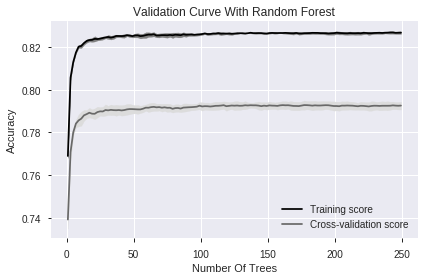

In [145]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = features, target

param_range = np.arange(1, 250, 2)
train_scores, test_scores = validation_curve(RandomForestClassifier(criterion='entropy',
                                n_estimators=1000,
                                max_features='auto',
                                oob_score=True,
                                min_samples_split=40,
                                random_state=60,
                                n_jobs=8), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [146]:
#the difference between train and validation accuracy is nearly 2%
#so we can say that the model is slghtly underfitting

/home/v/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


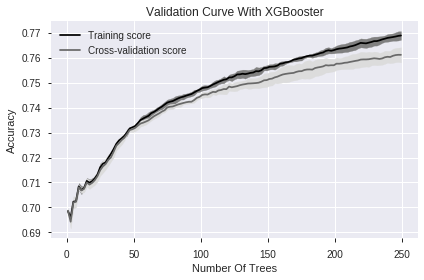

In [147]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

X, y = features, target

param_range = np.arange(1, 250, 2)
train_scores, test_scores = validation_curve(xgb.XGBClassifier(objective='multi:softprob',
                              subsample=0.5, colsample_bytree=0.5, 
                              seed=0), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With XGBooster")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [148]:
#the difference between model accuracy and validation accuracy is nearly 4%
#so we can say that the model is slghtly overfitting

#### REFERENCE :
##### https://github.com/pancr9/Pump-It-Up/blob/master/Pump%20It%20Up%20-%20Data%20Cleaning.ipynb
##### https://www.kaggle.com/arthurtok/feature-ranking-rfe-random-forest-linear-models
#### https://chrisalbon.com/machine_learning/model_evaluation/plot_the_validation_curve/